# Customer analysis

#### load the libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
data1 = pd.read_csv("shipments.csv")

In [9]:
data1.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Exploratory Data Analysis

In [10]:
#dropping the id column
data1 = data1.drop(columns='ID', axis=1)

In [11]:
data1.shape

(10999, 11)

In [12]:
data1.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [13]:
data1.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [15]:
#check if any duplicated records are present
data1.duplicated().sum()

0

In [16]:
#check for null values
data1.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [17]:
data1.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [18]:
#rename the columns
data2 = data1.rename({'Warehouse_block': 'warehouse','Mode_of_Shipment': 'shipmentmode','Customer_care_calls': 'cccalls',
                      'Customer_rating': 'custratings','Cost_of_the_Product': 'cost','Prior_purchases': 'priorpurchase',
                      'Product_importance': 'importance','Discount_offered': 'discount','Weight_in_gms': 'weight',
                      'Reached.on.Time_Y.N': 'reachedontime'}, axis=1)
data2.head()

,warehouse,shipmentmode,cccalls,custratings,cost,priorpurchase,importance,Gender,discount,weight,reachedontime
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [19]:
data2.columns

Index(['warehouse', 'shipmentmode', 'cccalls', 'custratings', 'cost',
       'priorpurchase', 'importance', 'Gender', 'discount', 'weight',
       'reachedontime'],
      dtype='object')

## Data Insight and Visualisation

In [20]:
data2.reachedontime.value_counts()

1    6563
0    4436
Name: reachedontime, dtype: int64

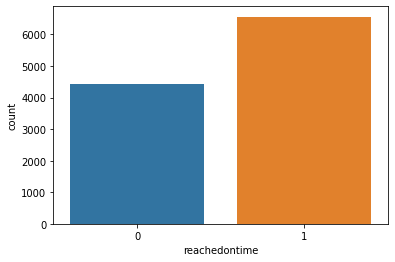

In [21]:
#Counting no of Product which has reached ontime and not on time
sns.countplot(x='reachedontime',data=data2)
plt.show()

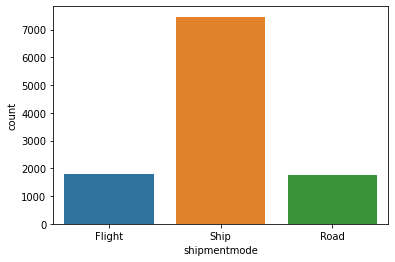

In [22]:
#Counting no of Mode of transport used for delivering the product
sns.countplot(x='shipmentmode',data=data2)
plt.show()

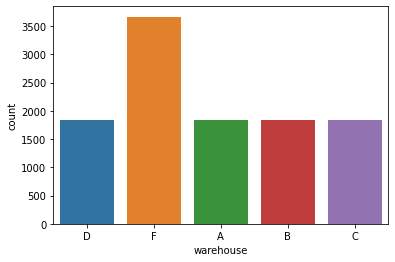

In [23]:
#Counting no of Warehouse the product has been dispatched
sns.countplot(x='warehouse',data=data2)
plt.show()

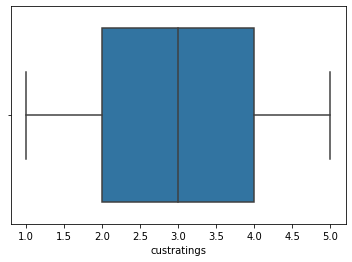

In [24]:
sns.boxplot(data=data2,x='custratings')

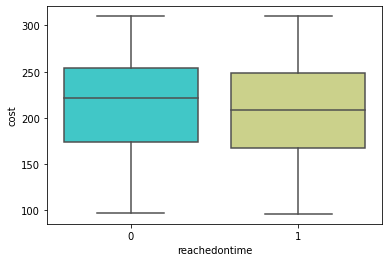

In [25]:
#Counting Based on Product cost Range if the product has reached on time or not
sns.boxplot(x='reachedontime',y='cost',data=data2,palette='rainbow')

In [26]:
#Counting Based on Customer Prior Purchase if the product has reached on time or not
table = pd.crosstab(index=data2["priorpurchase"], columns=data2["reachedontime"])
table

reachedontime,0,1
priorpurchase,,
2,974,1625
3,1421,2534
4,984,1171
5,645,642
6,247,314
7,44,92
8,45,83
10,76,102


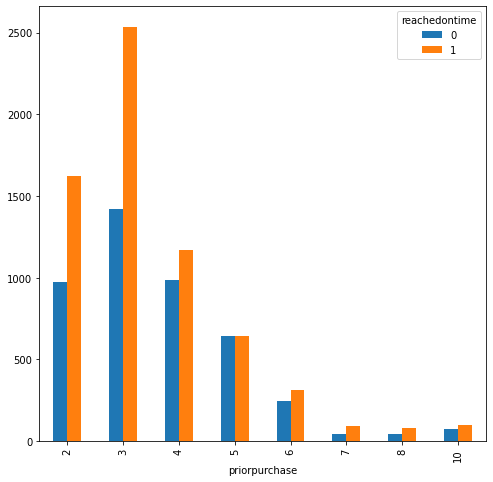

In [27]:
table.plot(kind="bar", figsize=(8,8))
plt.show()

In [28]:
#Counting Based on Product Importance if the product has reached on time or not
table = pd.crosstab(index=data2["importance"], columns=data2["reachedontime"])
table

reachedontime,0,1
importance,,
high,332,616
low,2157,3140
medium,1947,2807


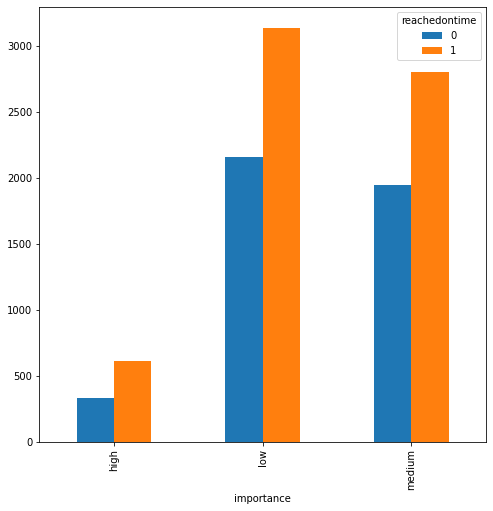

In [29]:
table.plot(kind="bar", figsize=(8,8))
plt.show()

In [30]:
#Counting Based on Sex if the product has reached on time or not
table = pd.crosstab(index=data2["Gender"], columns=data2["reachedontime"])
table

reachedontime,0,1
Gender,,
F,2249,3296
M,2187,3267


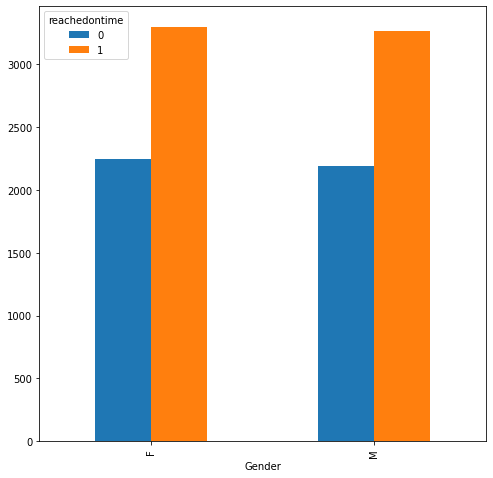

In [31]:
table.plot(kind="bar", figsize=(8,8))
plt.show()

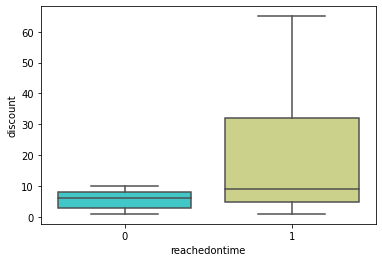

In [32]:
#Based on Product Discount Range if the product has reached on time
sns.boxplot(x='reachedontime',y='discount',data=data2,palette='rainbow')

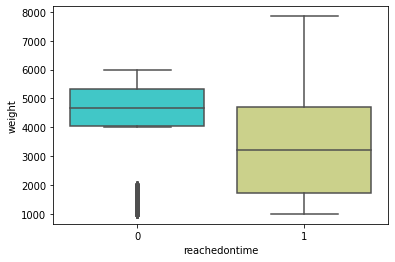

In [33]:
#Based on Product Weight Range if the product has reached on time or not
sns.boxplot(x='reachedontime',y='weight',data=data2,palette='rainbow')

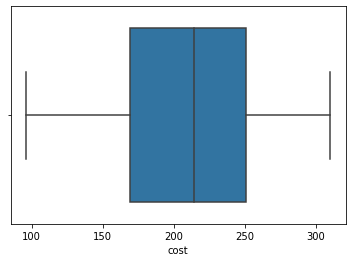

In [34]:
sns.boxplot(x=data2['cost'])

##### Hence we can observe that,
##### Most of our shipments are not on time.
##### In mode of shipment, ship is dominating the category. So we can interpret that probably most of our not on time shipment is coming from "ships". 
##### We can say that maximum customers gives 3 rating to the company. 
##### Customers who gives rating 3-5 received products on time. 
##### Customer who called less then 3 times are less then 200 and customers who called 4 times are more then 700 out of total population. This show that costumers query are not answered well therefore they are kept on call by the customer care. 
##### Customers who received a discount of more than 10 dollars did not receive on time delivery. This feature will play important role in prediction. 
##### Products between 2000-4000 and above 6000 grams are not delivered on time.

## Outlier detection

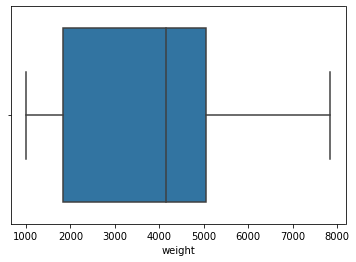

In [35]:
sns.boxplot(x=data2['weight'])

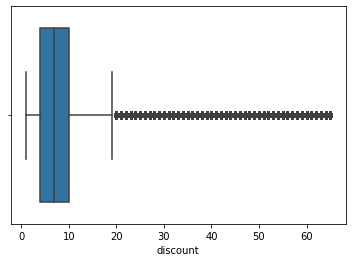

In [36]:
sns.boxplot(x=data2['discount'])

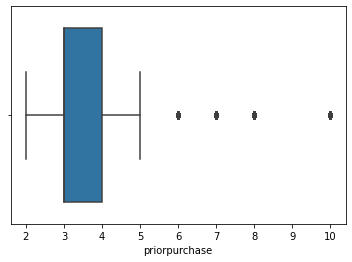

In [37]:
sns.boxplot(x=data2['priorpurchase'])

###### Discount contains outliers, ranges between 0-65%. Removing Outliers will affect the model as the test data also has Outliers between the same range.

## Correlation

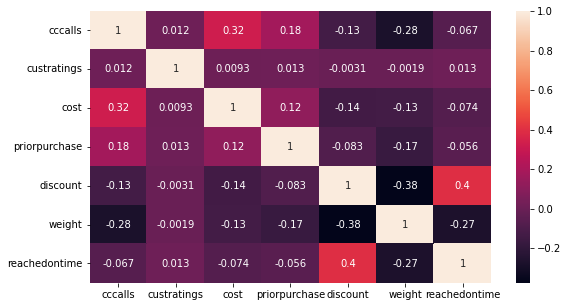

In [38]:
plt.figure(figsize=(9,5))
sns.heatmap(data2.corr(),annot=True)

##### As you can see there is a correalation between reached on time and discount offered. We interpreted that if we give discount more than 10 dollar to our customer, this order probably will not be on time. 
##### Cost of product and customer care calls have more strong relationship compared to other relationships. That means if our custumer pays more money for product, they have tendency to have more customer care calls.

## Feature Engineering

In [39]:
data2.head()

,warehouse,shipmentmode,cccalls,custratings,cost,priorpurchase,importance,Gender,discount,weight,reachedontime
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [40]:
#label encoding
data2["warehouse"].replace({"A":0,"B":1,"C":2,"D":3,"F":4},inplace=True)
data2["shipmentmode"].replace({"Flight":0,"Road":1,"Ship":2},inplace=True)
data2["importance"].replace({"low":0,"medium":1,"high":2},inplace=True)
data2["Gender"].replace({"M":1,"F":0},inplace=True)
data2

,warehouse,shipmentmode,cccalls,custratings,cost,priorpurchase,importance,Gender,discount,weight,reachedontime
0,3,0,4,2,177,3,0,0,44,1233,1
1,4,0,4,5,216,2,0,1,59,3088,1
2,0,0,2,2,183,4,0,1,48,3374,1
3,1,0,3,3,176,4,1,1,10,1177,1
4,2,0,2,2,184,3,1,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,1,0,1,1538,1
10995,1,2,4,1,232,5,1,0,6,1247,0
10996,2,2,5,4,242,5,0,0,4,1155,0
10997,4,2,5,2,223,6,1,1,2,1210,0


In [41]:
# separate array into input and output components
x = data2
X = x.drop('reachedontime', axis=1)
Y = data2['reachedontime']

## Model Validation

In [42]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [43]:
#remove the scaling effect from the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(x_train)
test = scaler.fit_transform(x_test)

## Balancing the data with smoteenn

In [44]:
from imblearn.combine import SMOTEENN
from collections import Counter

sme = SMOTEENN()
xx,yy = sme.fit_resample(train, y_train)
xxtest,yytest = sme.fit_resample(test, y_test)
print(f'Original train dataset shape: {Counter(y_train)}')
print(f'Resampled train dataset shape: {Counter(yy)}\n')
print(f'Resampled test dataset shape: {Counter(yytest)}\n')

Original train dataset shape: Counter({1: 5248, 0: 3551})
Resampled train dataset shape: Counter({0: 2439, 1: 2353})

Resampled test dataset shape: Counter({0: 632, 1: 546})



## random forest

In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Random Forest": RandomForestClassifier(max_depth=850, min_samples_leaf= 2, 
                                                                     min_samples_split= 2)}
    
for name, rfmodel in models.items():
    rfmodel.fit(xx,yy)
    print(name + "train" + ": {:.2f}%".format(rfmodel.score(xx,yy) * 100))
    print(name + "test" + ": {:.2f}%".format(rfmodel.score(xxtest,yytest) * 100))

Random Foresttrain: 98.18%
Random Foresttest: 95.50%


In [46]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
pred2=rfmodel.predict(xxtest)
cm=confusion_matrix(yytest,pred2)
print(cm)

[[625   7]
 [ 46 500]]


# random forest with entropy

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=850, random_state=20)
Random_Forest_Model = rf.fit(xx,yy)
print('Accuracy of Random Forest Classifier on train set: {:.2f}'.format(Random_Forest_Model.score(xx,yy)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(Random_Forest_Model.score(xxtest,yytest)))

Accuracy of Random Forest Classifier on train set: 1.00
Accuracy of Random Forest Classifier on test set: 0.96


In [48]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
pred3=rf.predict(xxtest)
cm=confusion_matrix(yytest,pred3)
print(cm)

[[628   4]
 [ 45 501]]


# SVM

In [49]:
from sklearn import svm
from sklearn.svm import SVC
model_rbf = svm.SVC()
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(xx,yy)
print('Accuracy of SVM Classifier on train set: {:.2f}'.format(model_rbf.score(xx,yy)))
print('Accuracy of SVM Classifier on test set: {:.2f}'.format(model_rbf.score(xxtest,yytest)))

Accuracy of SVM Classifier on train set: 0.95
Accuracy of SVM Classifier on test set: 0.95


In [50]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
pred4=model_rbf.predict(xxtest)
cm=confusion_matrix(yytest,pred4)
print(cm)

[[626   6]
 [ 54 492]]


# xgBoost

In [51]:
from xgboost import XGBClassifier
model4 = XGBClassifier(max_depth=6, n_estimators=250)
model4.fit(xx,yy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
print('Accuracy of xgboost Classifier on train set: {:.2f}'.format(model4.score(xx,yy)))
print('Accuracy of xgboost Classifier on test set: {:.2f}'.format(model4.score(xxtest,yytest)))

Accuracy of xgboost Classifier on train set: 1.00
Accuracy of xgboost Classifier on test set: 0.95


In [53]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
pred6=model4.predict(xxtest)
cm=confusion_matrix(yytest,pred6)
print(cm)

[[628   4]
 [ 52 494]]


# adaboost

In [54]:
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10)
model7 = AdaBoostClassifier(n_estimators=num_trees)
trainresults = cross_val_score(model7, xx,yy, cv=kfold)
testresults = cross_val_score(model7, xxtest,yytest, cv=kfold)
print(trainresults.mean())
print(testresults.mean())

0.9258994432846206
0.9320005794582066


# decision tree

In [55]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [56]:
model8 = DecisionTreeClassifier(criterion = 'entropy',max_depth=None)
model8.fit(xx,yy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
traind = cross_val_score(model8, xx,yy, cv=kfold)
testd = cross_val_score(model8, xxtest,yytest, cv=kfold)
print(traind.mean())
print(testd.mean())

0.9182150313152402
0.9253005939446618


In [58]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
pred8=model8.predict(xxtest)
cm=confusion_matrix(yytest,pred8)
print(cm)

[[568  64]
 [ 40 506]]
